<a href="https://colab.research.google.com/github/L1ebert/Barbershop/blob/master/vkr_telecom_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сегментация клиентской базы телекоммуникационной компании

**Аналитическая задача** — провести анализ данных с целью выделения наиболее типичных групп клиентов и разработки предложений для каждой из групп.

## Описание данных
Каждый клиент описывается следующим набором признаков:
- `Возраст`, `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Звонки в другие страны`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`, `Дата подключения тарифа`.

## Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

**Шаг 3.** Добавление новых переменных:
- по значениям признака `Возраст` введите новую переменную `Возрастная категория`, принимающую значения "студент", "аспирант", "бизнесмен" и "знаток" по следующую правилу:

$$
\text{Возрастная категория} =
\left\{
\begin{array}{l}
\text{студент,} \quad \text{если Возраст } \in [19, 24];\\  
\text{аспирант,} \quad \text{если Возраст } \in [25, 33];\\
\text{бизнесмен,} \quad \text{если Возраст } \in [34, 56];\\
\text{знаток,} \quad \text{если Возраст } \in [57, 70].
\end{array}
\right.
$$

- по значениям признака `Дата подключения тарифа` создайте признаки: `Год подключения`, `Месяц подключения`, `Дата подключения`;  

**Шаг 4.** Провести исследовательский анализ данных:
- в разрезе значений признаков `Год подключения`, `Месяц подключения`, `Дата подключения` исследуйте:
    - динамику подключения к тарифам (количество клиентов). Постройте графики. В какой год, месяц и день подключались меньше/больше всего клиентов? Какие выводы можно сделать?
- в разрезе значений признака `Возрастная категория` исследуйте распределение признаков `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Для каждого из признаков рассчитайте выборочное среднее, медиану и моду. Постройте графики. Какие выводы можно сделать о предпочтениях клиентов разных возрастных категорий в отношении используемых услуг (звонков и SMS; времени суток);
- клиенты каких возрастных категорий (ТОП-2):
  
    - больше всего в среднем в месяц тратят на оплату услуг связи;
    - больше всего тратят времени на общение в месяц днем, вечером и ночью;
    - больше всего по количеству звонков в месяц днем, вечером и ночью. Совпадают ли результаты с предыдущем пунктом;

- с помощью диаграмм рассеивания исследуейте зависимости между признаками `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Какие выводы можно сделать?

## Знакомство с данными

In [ ]:
# подключение библиотек
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2 линии нижнего и верхнего усов
#для подсчета значений нижнего и верхнего усов была предложена следующая функция
def calc_boxplot(df_col : pd.Series) -> tuple:

    """
    Функция для расчета значений нижнего и верхнего усов.
    На вход подается столбец датафрейма,
    на выходе кортеж: первый элемент -- нижний ус, второй элемент -- верхний ус
    """

    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

In [ ]:
# загрузка данных

df = pd.read_csv('/content/dataset_telecom.csv')
df.head();

In [ ]:
# информация о типах данных

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Возраст                                4492 non-null   int64  
 1   Среднемесячный расход                  4468 non-null   float64
 2   Средняя продолжительность разговоров   4475 non-null   float64
 3   Звонков днем за месяц                  4472 non-null   float64
 4   Звонков вечером за месяц               4489 non-null   float64
 5   Звонков ночью за месяц                 4492 non-null   object 
 6   Звонки в другие города                 4492 non-null   object 
 7   Звонки в другие страны                 4492 non-null   int64  
 8   Доля звонков на стационарные телефоны  4492 non-null   object 
 9   Количество SMS за месяц                4492 non-null   object 
 10  Дата подключения тарифа                4492 non-null   object 
dtypes: f

In [ ]:
# описательные статистики
per = [0.01, 0.05, 0.25, 0.5, 0.75, 0.81, 0.95]
df.describe(percentiles=per);


**Выводы по набору**

|Признак|Комментарий|
|--:|:--|
|`*`|Скорректировать заголовки|
|`Дата подключения тарифа`|Скорректировать тип данных|
|`Звонков ночью за месяц`, `Звонки в другие города `|
|`Доля звонков на стационарные телефоны`, `Количество SMS за месяц`|Некорректный тип данных|
|`*`|Имеются пропуски|
|`Звонки в другие страны`|Рассмотреть отдельно|









## Предобработка данных

In [ ]:
# корректировка типов данных

# рассмотрим признаки Звонков ночью за месяц, Звонки в другие города,
# Доля звонков на стационарные телефоны, Количество SMS за месяц
df['Звонков ночью за месяц'].unique()

# видим, что отдельные значения признака "'7'" представляют собой строку в строке,
# следовательно, необходимо выполнить соответствующее преобразование

def str_to_float(x:str):
    if x.isdigit():
        return float(x) # '5'
    else:
        return float(x.replace("'", '')) # "'7'"

In [ ]:
# наименование столбцов с типом 'object'
df.select_dtypes('object').columns

Index(['Звонков ночью за месяц', 'Звонки в другие города',
       'Доля звонков на стационарные телефоны', 'Количество SMS за месяц',
       'Дата подключения тарифа'],
      dtype='object')

In [ ]:
# применение функции к нескольким столбцам
lst_col = ['Звонков ночью за месяц', 'Звонки в другие города',
           'Доля звонков на стационарные телефоны',
           'Количество SMS за месяц']

for col in lst_col:
    df[col] = df[col].apply(str_to_float)

In [ ]:
# проверка корректности исправления типа данных признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Возраст                                4492 non-null   int64  
 1   Среднемесячный расход                  4468 non-null   float64
 2   Средняя продолжительность разговоров   4475 non-null   float64
 3   Звонков днем за месяц                  4472 non-null   float64
 4   Звонков вечером за месяц               4489 non-null   float64
 5   Звонков ночью за месяц                 4492 non-null   float64
 6   Звонки в другие города                 4492 non-null   float64
 7   Звонки в другие страны                 4492 non-null   int64  
 8   Доля звонков на стационарные телефоны  4492 non-null   float64
 9   Количество SMS за месяц                4492 non-null   float64
 10  Дата подключения тарифа                4492 non-null   object 
dtypes: f

In [ ]:
# корректировка типа признака -- дата
df = df.astype({'Дата подключения тарифа': 'datetime64[ms]'})
# проверка
df.dtypes

,0
Возраст,int64
Среднемесячный расход,float64
Средняя продолжительность разговоров,float64
Звонков днем за месяц,float64
Звонков вечером за месяц,float64
Звонков ночью за месяц,float64
Звонки в другие города,float64
Звонки в другие страны,int64
Доля звонков на стационарные телефоны,float64
Количество SMS за месяц,float64


In [ ]:
# поиск и обработка дублирующихся записей

df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['Возраст', 'Среднемесячный расход',
       'Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие города', 'Звонки в другие страны',
       'Доля звонков на стационарные телефоны', 'Количество SMS за месяц',
       'Дата подключения тарифа'],
      dtype='object')

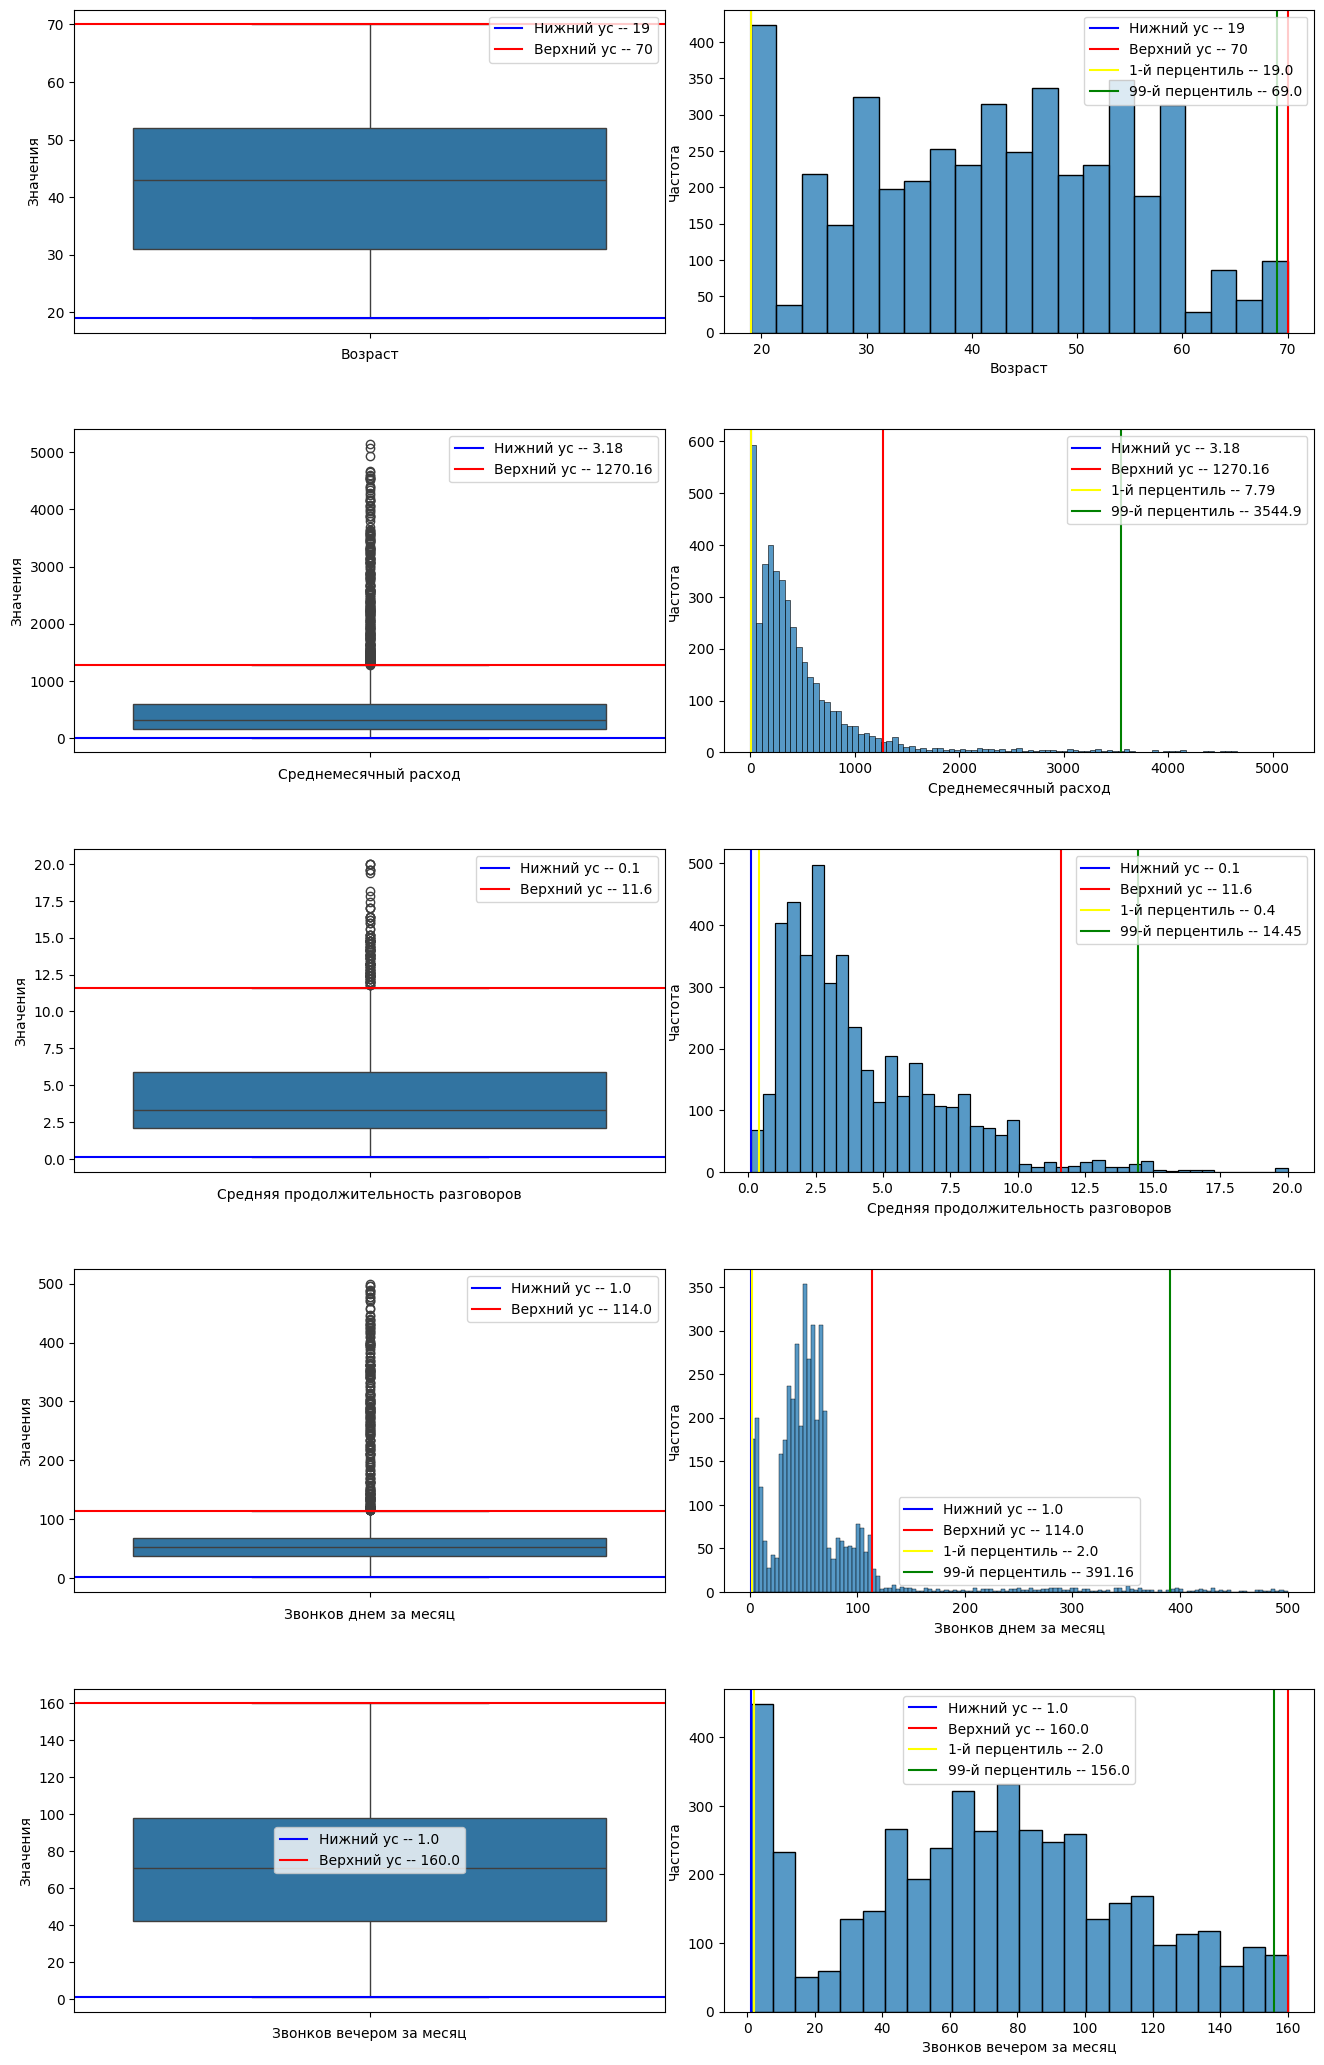

In [ ]:
# поиск и обработка аномальных значений
lst_columns = ['Возраст', 'Среднемесячный расход',
               'Средняя продолжительность разговоров', 'Звонков днем за месяц',
               'Звонков вечером за месяц', 'Звонков ночью за месяц',
               'Звонки в другие города', 'Доля звонков на стационарные телефоны',
               'Количество SMS за месяц']


# для выявления аномальных занчений признака
# воспользуемся графиком boxplot (ящик с усами) и гистограммой

# задание сетки 5 признаков,
# для каждого признака по 2 графика
fig, ax = plt.subplots(5,2, figsize=(16,26), gridspec_kw={"wspace": 0.1,
                                                          "hspace": 0.3})

for index, col in enumerate(lst_columns[:5]):
    plt.subplot(5,2, 2*index+1) # 2*n+1, n = 0,1,2,3,
    # расчет значений нижнего и верхнего уса
    low_value, high_value = calc_boxplot(df[col])
    ax = sns.boxplot(y=df[col])
    # визуализация усов
    ax.axhline(low_value,
               color='blue',
               label=f"Нижний ус -- {np.round(low_value, 2)}")
    ax.axhline(high_value,
               color='red',
               label=f"Верхний ус -- {np.round(high_value, 2)}")
    ax.set_xlabel(f"{col}")
    ax.set_ylabel("Значения")
    plt.legend()

    plt.subplot(5,2, 2*index+2) # 2*n+2, n = 0,1,2,3,
    # расчет 1 и 99 --перцентилей
    per_1  = np.nanpercentile(df[col], 1)
    per_99 = np.nanpercentile(df[col], 99)

    ax = sns.histplot(x=df[col])

    # визуализация усов
    ax.axvline(low_value,
               color='blue',
               label=f"Нижний ус -- {np.round(low_value, 2)}")
    ax.axvline(high_value,
               color='red',
               label=f"Верхний ус -- {np.round(high_value, 2)}")

    # визуализация перцентилей
    ax.axvline(per_1,
               color='yellow',
               label=f"1-й перцентиль -- {np.round(per_1, 2)}")
    ax.axvline(per_99,
               color='green',
               label=f"99-й перцентиль -- {np.round(per_99, 2)}")
    ax.set_xlabel(f"{col}")
    ax.set_ylabel("Частота")
    plt.legend()


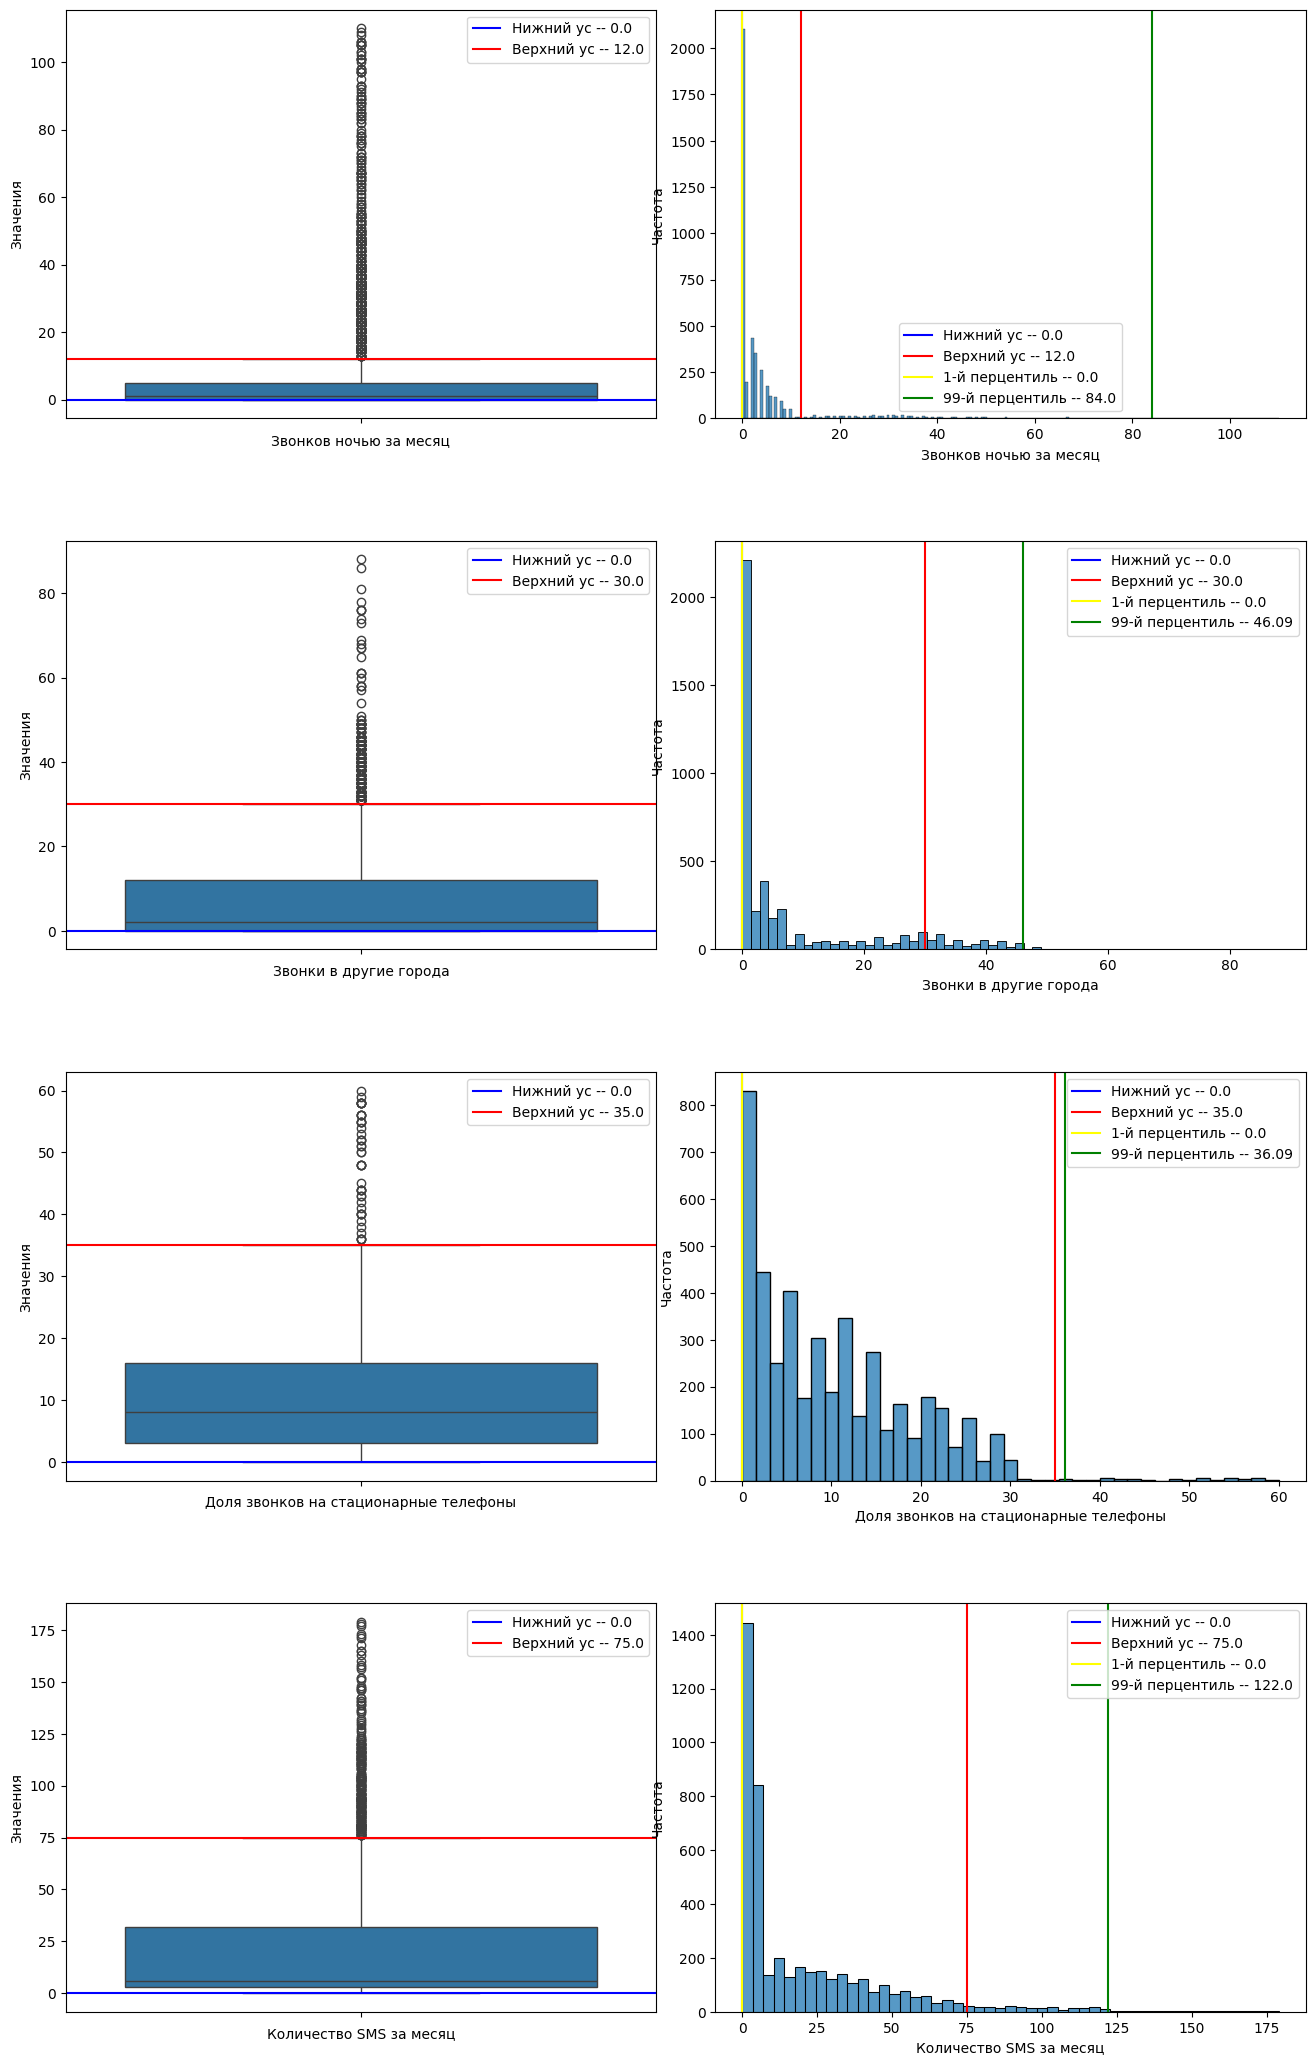

In [ ]:
# поиск аномалий для оставшихся признаков
fig, ax = plt.subplots(4,2, figsize=(16,26), gridspec_kw={"wspace": 0.1,
                                                          "hspace": 0.3})

for index, col in enumerate(lst_columns[5:]):
    plt.subplot(4,2, 2*index+1) # 2*n+1, n = 0,1,2,3,
    # расчет значений нижнего и верхнего уса
    low_value, high_value = calc_boxplot(df[col])
    ax = sns.boxplot(y=df[col])
    # визуализация усов
    ax.axhline(low_value,
               color='blue',
               label=f"Нижний ус -- {np.round(low_value, 2)}")
    ax.axhline(high_value,
               color='red',
               label=f"Верхний ус -- {np.round(high_value, 2)}")
    ax.set_xlabel(f"{col}")
    ax.set_ylabel("Значения")
    plt.legend()

    plt.subplot(4,2, 2*index+2) # 2*n+2, n = 0,1,2,3,
    # расчет 1 и 99 --перцентилей
    per_1  = np.nanpercentile(df[col], 1)
    per_99 = np.nanpercentile(df[col], 99)

    ax = sns.histplot(x=df[col])

    # визуализация усов
    ax.axvline(low_value,
               color='blue',
               label=f"Нижний ус -- {np.round(low_value, 2)}")
    ax.axvline(high_value,
               color='red',
               label=f"Верхний ус -- {np.round(high_value, 2)}")

    # визуализация перцентилей
    ax.axvline(per_1,
               color='yellow',
               label=f"1-й перцентиль -- {np.round(per_1, 2)}")
    ax.axvline(per_99,
               color='green',
               label=f"99-й перцентиль -- {np.round(per_99, 2)}")
    ax.set_xlabel(f"{col}")
    ax.set_ylabel("Частота")
    plt.legend()


In [ ]:
# фильтр для отсеивания аномальных значений
# для записи выполнение этого условия означает, что она не является аномальной

flt = (
    (df['Среднемесячный расход'].between(np.nanpercentile(df['Среднемесячный расход'], 1),
                                         calc_boxplot(df['Среднемесячный расход'])[1])) &
    (df['Средняя продолжительность разговоров'].between(calc_boxplot(df['Средняя продолжительность разговоров'])[0],
                                                        np.nanpercentile(df['Средняя продолжительность разговоров'], 99))) &
    (df['Звонков днем за месяц'].between(calc_boxplot(df['Звонков днем за месяц'])[0],
                                         calc_boxplot(df['Звонков днем за месяц'])[1])) &
    (df['Звонков ночью за месяц'].between(calc_boxplot(df['Звонков ночью за месяц'])[0],
                                         calc_boxplot(df['Звонков ночью за месяц'])[1])) &
    (df['Звонки в другие города'].between(np.nanpercentile(df['Звонки в другие города'], 1),
                                         np.nanpercentile(df['Звонки в другие города'], 99))) &
    (df['Доля звонков на стационарные телефоны'].between(calc_boxplot(df['Доля звонков на стационарные телефоны'])[0],
                                                         calc_boxplot(df['Доля звонков на стационарные телефоны'])[1])) &
    (df['Количество SMS за месяц'].between(np.nanpercentile(df['Количество SMS за месяц'], 1),
                                         np.nanpercentile(df['Количество SMS за месяц'], 99)))
    )


In [ ]:
# процент оставшихся данных

print(f"Процент удаленных записей {(1 - df.loc[flt].shape[0]/df.shape[0]):.2%}")

Процент удаленных записей 16.01%


In [ ]:
# сформируем несколько наборов данных для последующего анализа

# клиенты без аномальных записей
df_ok = df.loc[flt]

# клиенты c аномальными записями
df_anomals = df.loc[~flt]

# Далее будем исследовать только записи без аномальных значений.
# Желающие дополнительно могут исследовать записи с аномальными значениями

In [ ]:
# обработка пропущенных значений
df_ok.isna().sum()
# удалим пропущенные значения
df_ok.dropna(inplace=True)

/tmp/ipython-input-4121112436.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ok.dropna(inplace=True)


# Выводы и результаты:
в данной части работы
- скорректированы типы признаков;
- исправлены значения отдельных числовых признаков;
- исследованы аномальные значения признаков;
- выделены наборы записей без аномальных значений и с аномальными значениями. Набор с аномальными значениями требует отдельного изучения;
- обнаружены пропущенные значения и ввиду их малочисленности они были удалены.

Имеющиеся данные подготовлены для дальнейшего исследования.

**Шаг 3.** Добавление новых переменных:
- по значениям признака `Возраст` введите новую переменную `Возрастная категория`, принимающую значения "студент", "аспирант", "бизнесмен" и "знаток" по следующую правилу:

$$
\text{Возрастная категория} =
\left\{
\begin{array}{l}
\text{студент,} \quad \text{если Возраст } \in [19, 24];\\  
\text{аспирант,} \quad \text{если Возраст } \in [25, 33];\\
\text{бизнесмен,} \quad \text{если Возраст } \in [34, 56];\\
\text{знаток,} \quad \text{если Возраст } \in [57, 70].
\end{array}
\right.
$$

- по значениям признака `Дата подключения тарифа` создайте признаки: `Год подключения`, `Месяц подключения`, `Дата подключения`.

In [ ]:
# добавление новых переменных

# по значениям признака Возраст введите новый признак Возрастная категория

# словарь с правилом установления статуса
dct_status = {'студент': [19, 24],
              'аспирант': [25, 33],
              'бизнесмен': [34, 56],
              'знаток': [57, 70]}

# функция для задания нового признака -- Возрастная категория
def get_status(x, dct_status):
    """
    Функция возращает возрастную категорию клиента в зависимости от возраста
    """
    for status, lst_age in dct_status.items():
        low, high = lst_age
        if ((low <= x) & (x<=high)):
            return status

In [ ]:
# новый признак -- Возрастная категория
df_ok['Возрастная категория'] = df_ok['Возраст'].apply(get_status,
                                                       args=(dct_status,))

/tmp/ipython-input-3760161746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ok['Возрастная категория'] = df_ok['Возраст'].apply(get_status,


In [ ]:
# проверка
df_ok[['Возраст', 'Возрастная категория']].head(2)

,Возраст,Возрастная категория
1,51,бизнесмен
2,41,бизнесмен


In [ ]:
# по значениям признака Дата подключения тарифа создайте признаки:
# Год подключения, Месяц подключения, Дата подключения.

df_ok.loc[:, 'Год подключения'] = df_ok['Дата подключения тарифа'].dt.year
df_ok.loc[:, 'Месяц подключения'] = df_ok['Дата подключения тарифа'].dt.strftime("%Y-%m")
df_ok.loc[:, 'Дата подключения'] = df_ok['Дата подключения тарифа'].dt.date

/tmp/ipython-input-1427569820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ok.loc[:, 'Год подключения'] = df_ok['Дата подключения тарифа'].dt.year
/tmp/ipython-input-1427569820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ok.loc[:, 'Месяц подключения'] = df_ok['Дата подключения тарифа'].dt.strftime("%Y-%m")
/tmp/ipython-input-1427569820.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Выводы и результаты:

на данном этапе добавлены новые признаки.

**Шаг 4.** Провести исследовательский анализ данных:
- в разрезе значений признаков `Год подключения`, `Месяц подключения`, `Дата подключения` исследуйте:
    - динамику подключения к тарифам (количество клиентов). Постройте графики. В какой год, месяц и день подключались меньше/больше всего клиентов? Какие выводы можно сделать?
- в разрезе значений признака `Возрастная категория` исследуйте распределение признаков `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Для каждого из признаков рассчитайте выборочное среднее, медиану и моду. Постройте графики. Какие выводы можно сделать о предпочтениях клиентов разных возрастных категорий в отношении используемых услуг (звонков и SMS; времени суток);
- клиенты каких возрастных категорий (ТОП-2):
  
    - больше всего в среднем в месяц тратят на оплату услуг связи;
    - больше всего тратят времени на общение в месяц днем, вечером и ночью;
    - больше всего по количеству звонков в месяц днем, вечером и ночью. Совпадают ли результаты с предыдущем пунктом;

- с помощью диаграмм рассеивания исследуейте зависимости между признаками `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Какие выводы можно сделать?

Text(0.5, 1.0, 'Распределение подключений по годам')

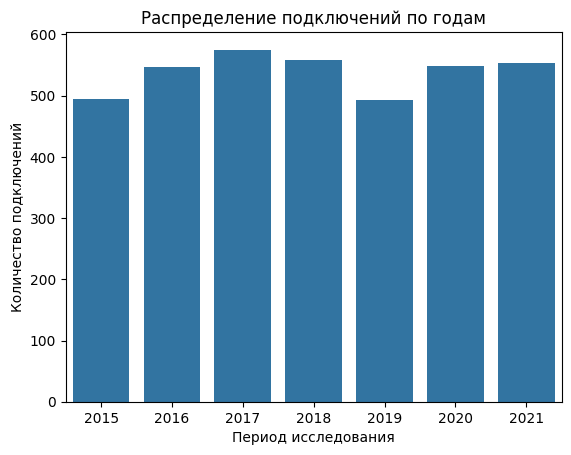

In [ ]:
# - в разрезе значений признаков `Год подключения`, `Месяц подключения`, `Дата подключения` исследуйте:
# - динамику подключения к тарифам (количество клиентов). Постройте графики.
# В какой год, месяц и день подключались меньше/больше всего клиентов?
# Какие выводы можно сделать?


# ежегодное количество новых клиентов
count_clients_year = (
    df_ok.groupby('Год подключения')
         .agg(Количество_подключений = ('Звонков днем за месяц', 'count'))
         .reset_index()
)

ax = sns.barplot(x=count_clients_year['Год подключения'],
                 y=count_clients_year['Количество_подключений'])
ax.set_xlabel('Период исследования')
ax.set_ylabel('Количество подключений')
ax.set_title('Распределение подключений по годам')

In [ ]:
#  год с наименьшими/ наибольшими подключениями

min_clients = count_clients_year.sort_values(by='Количество_подключений').iloc[0,1]
min_year = count_clients_year.sort_values(by='Количество_подключений').iloc[0,0]
max_clients = count_clients_year.sort_values(by='Количество_подключений').iloc[count_clients_year.shape[0]-1,1]
max_year = count_clients_year.sort_values(by='Количество_подключений').iloc[count_clients_year.shape[0]-1,0]

print(f"""Наименьшее количество подключений {min_clients} было в {min_year}.
Наибольшее количество подключений {max_clients} было в {max_year}.""")

Наименьшее количество подключений 493 было в 2019.
Наибольшее количество подключений 575 было в 2017.


/tmp/ipython-input-3065766368.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60);


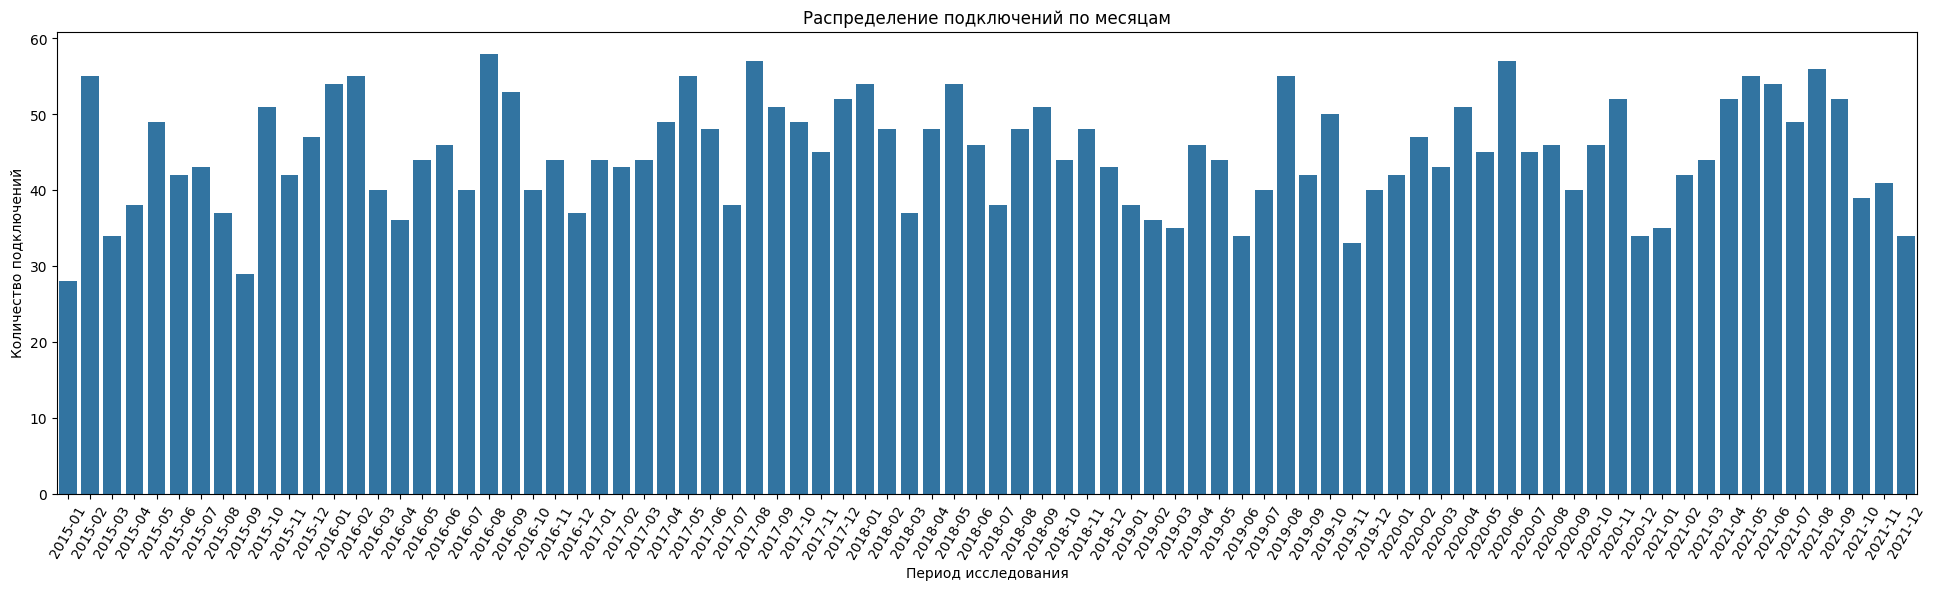

In [ ]:
# ежемесячное количество новых клиентов
count_clients_month = (
    df_ok.groupby('Месяц подключения')
         .agg(Количество_подключений = ('Звонков днем за месяц', 'count'))
         .reset_index()
)

plt.figure(figsize=(24,6))
ax = sns.barplot(x=count_clients_month['Месяц подключения'],
                 y=count_clients_month['Количество_подключений'])
ax.set_xlabel('Период исследования')
ax.set_ylabel('Количество подключений')
ax.set_title('Распределение подключений по месяцам')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60);

In [ ]:
#  месяц с наименьшими/ наибольшими подключениями

min_clients = count_clients_month.sort_values(by='Количество_подключений').iloc[0,1]
min_month = count_clients_month.sort_values(by='Количество_подключений').iloc[0,0]
max_clients = count_clients_month.sort_values(by='Количество_подключений').iloc[count_clients_month.shape[0]-1,1]
max_month = count_clients_month.sort_values(by='Количество_подключений').iloc[count_clients_month.shape[0]-1,0]

print(f"""Наименьшее количество подключений {min_clients} было в {min_month}.
Наибольшее количество подключений {max_clients} было в {max_month}.""")

Наименьшее количество подключений 28 было в 2015-01.
Наибольшее количество подключений 58 было в 2016-08.


- в разрезе значений признака `Возрастная категория` исследуйте распределение признаков `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Для каждого из признаков рассчитайте выборочное среднее, медиану и моду. Постройте графики. Какие выводы можно сделать о предпочтениях клиентов разных возрастных категорий в отношении используемых услуг (звонков и SMS; времени суток);

In [ ]:
df_ok.columns

Index(['Возраст', 'Среднемесячный расход',
       'Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие города', 'Звонки в другие страны',
       'Доля звонков на стационарные телефоны', 'Количество SMS за месяц',
       'Дата подключения тарифа', 'Возрастная категория', 'Год подключения',
       'Месяц подключения', 'Дата подключения'],
      dtype='object')

In [ ]:
 # Для каждого из признаков рассчитайте выборочное среднее, медиану и моду


lst_columns = ['Среднемесячный расход', 'Средняя продолжительность разговоров',
                'Звонков днем за месяц', 'Звонков вечером за месяц',
                'Звонков ночью за месяц', 'Звонки в другие города',
                'Звонки в другие страны', 'Доля звонков на стационарные телефоны',
                'Количество SMS за месяц']

In [ ]:
df_ok.groupby('Возрастная категория')[lst_columns].agg(['mean', 'median']);

In [ ]:
lst_status = df_ok['Возрастная категория'].unique()
lst_columns

for prop in lst_columns:
    print(f"--------- {prop} ---------")
    for status in lst_status:
        mean_my = df_ok[df_ok['Возрастная категория'] == status][prop].mean()
        median_my = df_ok[df_ok['Возрастная категория'] == status][prop].median()
        mode_my = df_ok[df_ok['Возрастная категория'] == status][prop].mode().to_list()
        print(f"{status}: выборочное среднее -- {mean_my:.2f}, медиана -- {median_my}, мода -- {mode_my}")

--------- Среднемесячный расход ---------
бизнесмен: выборочное среднее -- 366.60, медиана -- 311.345, мода -- [13.92]
аспирант: выборочное среднее -- 407.09, медиана -- 338.88, мода -- [267.54]
знаток: выборочное среднее -- 281.54, медиана -- 197.675, мода -- [16.8]
студент: выборочное среднее -- 177.63, медиана -- 132.3, мода -- [17.96, 24.08, 25.23, 29.81, 33.25, 106.75, 108.54, 114.66, 127.4, 161.28, 240.15]
--------- Средняя продолжительность разговоров ---------
бизнесмен: выборочное среднее -- 3.76, медиана -- 3.2, мода -- [1.7]
аспирант: выборочное среднее -- 3.97, медиана -- 3.5, мода -- [1.1]
знаток: выборочное среднее -- 3.26, медиана -- 2.7, мода -- [2.5]
студент: выборочное среднее -- 2.63, медиана -- 2.3, мода -- [0.6, 3.0]
--------- Звонков днем за месяц ---------
бизнесмен: выборочное среднее -- 52.44, медиана -- 53.0, мода -- [62.0]
аспирант: выборочное среднее -- 57.68, медиана -- 55.0, мода -- [55.0]
знаток: выборочное среднее -- 39.73, медиана -- 42.0, мода -- [5.0]

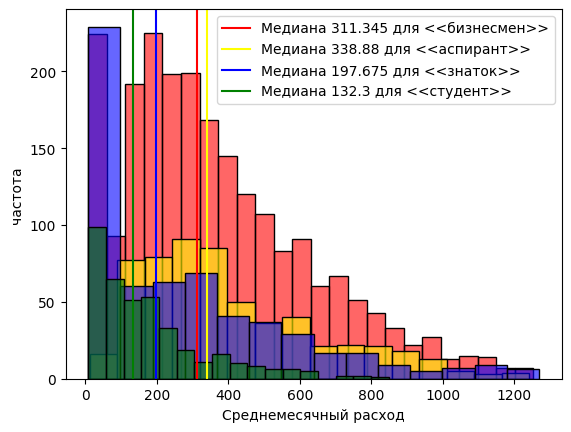

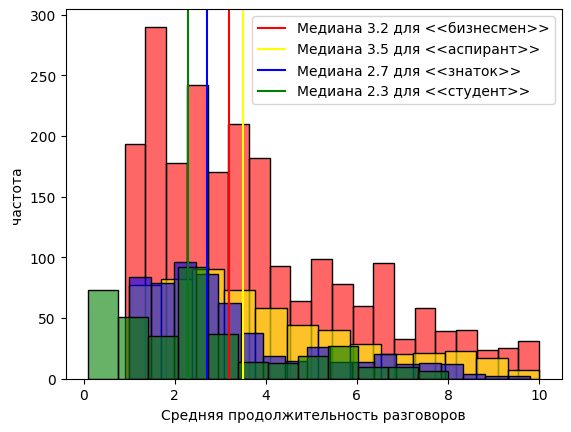

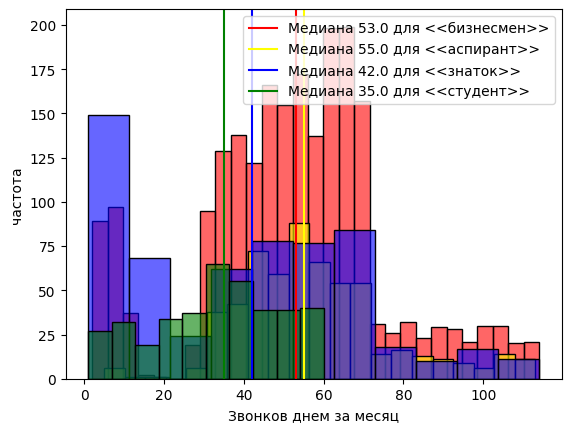

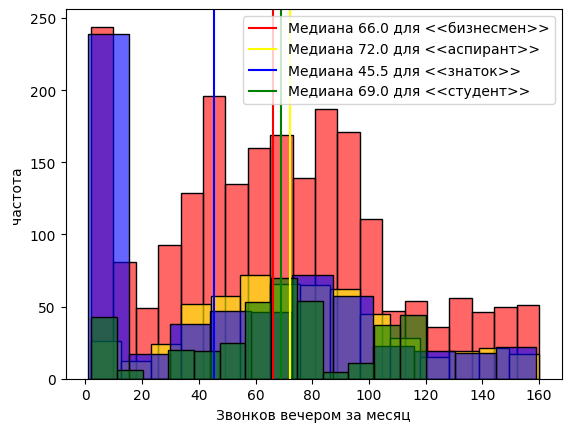

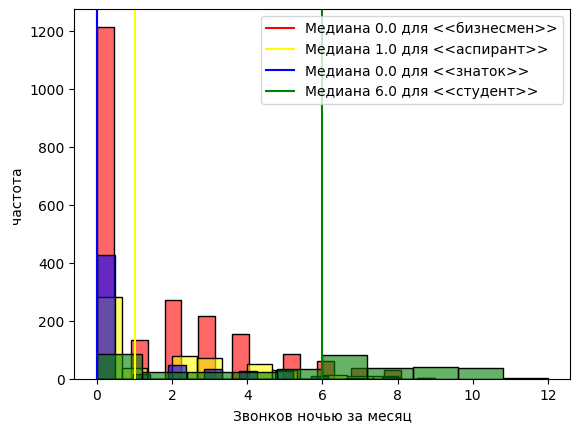

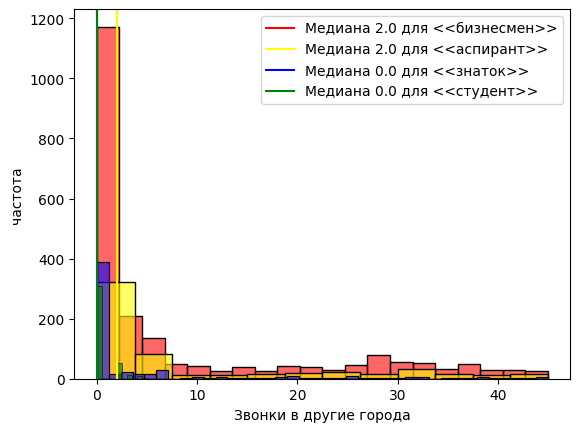

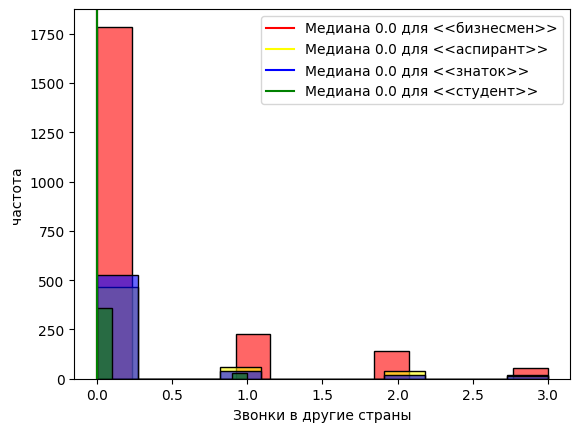

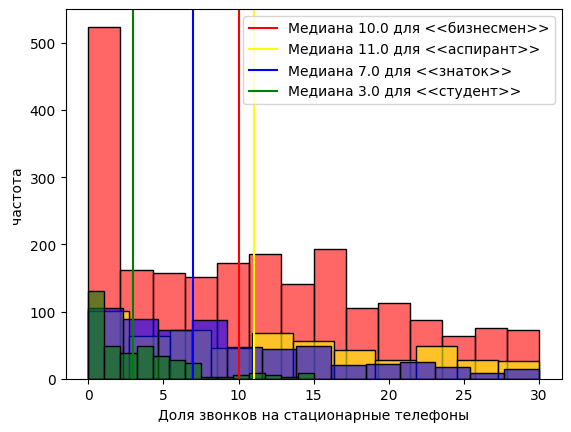

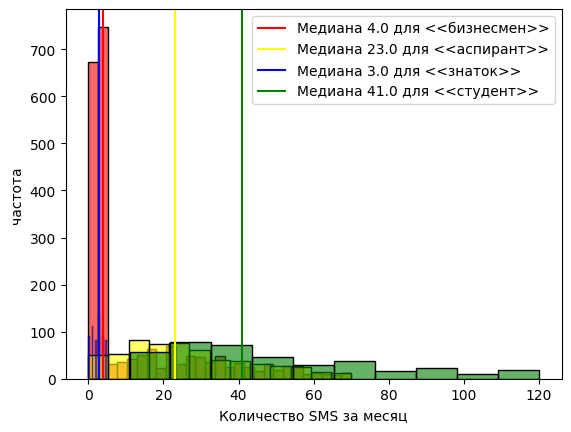

In [ ]:
# визуализация
colors_status = {'студент': 'green',
                 'аспирант': 'yellow',
                 'знаток': 'blue',
                 'бизнесмен': 'red'
                 }
for prop in lst_columns:
    for status in lst_status:
        ax = sns.histplot(x=df_ok[df_ok['Возрастная категория'] == status][prop],
                    color=colors_status.get(status),
                    alpha=0.6)
        # линии
        median_my = df_ok[df_ok['Возрастная категория'] == status][prop].median()
        ax.axvline(median_my,
                color=colors_status.get(status),
                label=f'Медиана {median_my} для <<{status}>>')
        ax.set_xlabel(prop)
        ax.set_ylabel('частота')
        plt.legend()
    plt.show()

с помощью диаграмм рассеивания исследуейте зависимости между признаками Среднемесячный расход, Средняя продолжительность разговоров, Звонков днем за месяц, Звонков вечером за месяц, Звонков ночью за месяц, Звонки в другие города, Доля звонков на стационарные телефоны, Количество SMS за месяц. Какие выводы можно сделать?

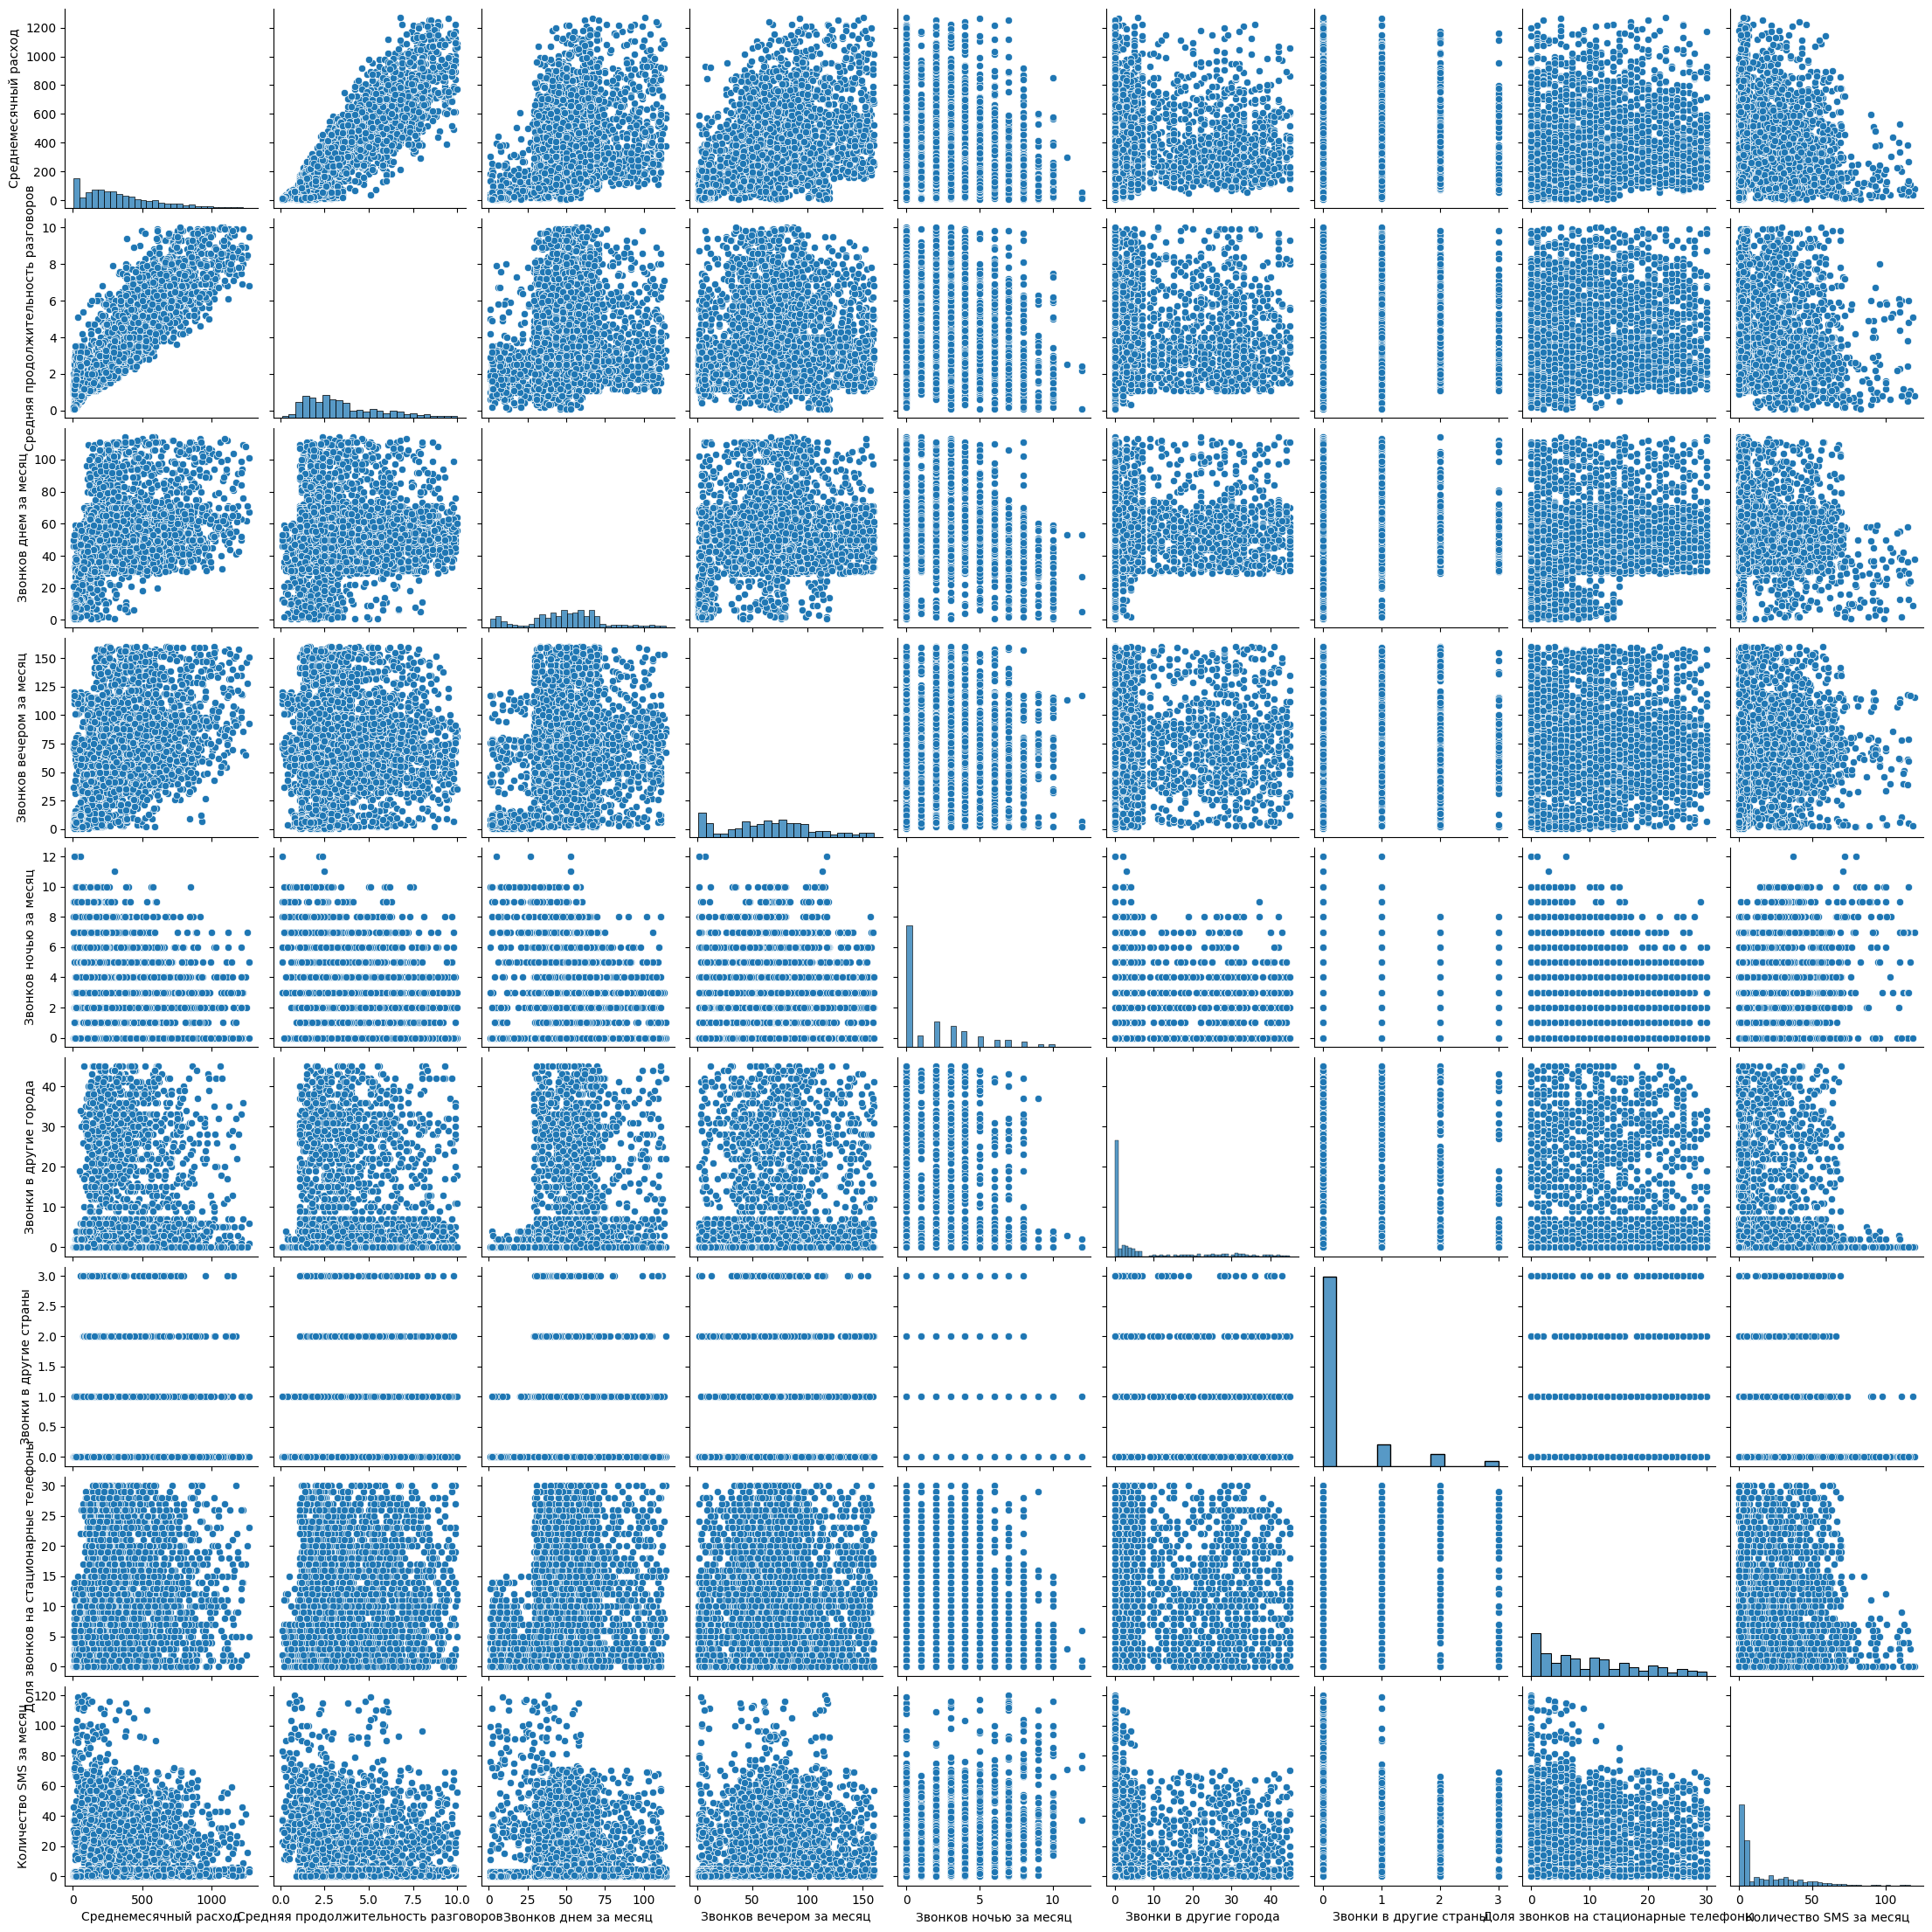

In [ ]:
# ДИАГРАММА РАССЕИВАНИЯ
sns.pairplot(df_ok[lst_columns])

Вывод и результаты:

-- исследование распределений подключений новых клиентов по годам и месяц не повзоляет сделать вывод о наличие некоторой динамики за эти временные отрезки;

-- по объему потребляемых услуг имеем:

Среднемесячный расход -- больше всего в месяц за услуги  связи платят категории клиентов "Аспирант" и "Бизнесмен".
....

   

  




In [ ]:
df = pd.read_csv('/content/vkr_project_retail.csv')
df.head(10)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


In [ ]:
# словарь для категорий

dct_catalog = {'сад и огород': ['растение', 'радермахера',
                                'хризолидокарпус', 'циперус', 'юкка',
                                'шеффлера', 'рассада'],
               'товары для дома': ['сушилка', 'таз', 'гладильн']}

def set_category(x, dct_catalog):
    for category, lst_key_words in dct_catalog.items():
        for word in lst_key_words:
            if word in x.lower():
                return category
    return True

In [ ]:
df['category'] = df['product'].apply(set_category, args=(dct_catalog,))

In [ ]:
#pd.set_option('col_width', 2000)
df[df['category'] == True][['product', 'category']].head(10)

,product,category
5,Шеффлера Лузеана d-9 см,True
10,Вешалка для брюк металлическая с резиновым пок...,True
12,Чехол Eurogold Clean Basic хлопок для досок 12...,True
13,Крючок одежный 2-х рожковый серый металлик с п...,True
14,"Корзина мягкая пластиковая 17 л, М-пластика, M...",True
15,"Мини-сковорода Marmiton ""Сердце"" с антипригарн...",True
16,Сковорода алюминиевая с антипригарным покрытие...,True
17,Стеклянная крышка для сковороды ALPENKOK 26 см...,True
21,Сумка-тележка 2-х колесная Gimi Argo синяя,True
23,"Рассада зелени для кухни Базилик Тонус, кассет...",True
